<a href="https://colab.research.google.com/github/Zlaton99/MKK/blob/main/Test_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import re
!pip install streamlit


In [44]:
import streamlit as st


In [45]:
features = []
labels = []

with open("/content/XY.txt", "r", encoding='utf-8') as fopen:
    for i in fopen:
        i = i.strip().split(",")
        features.append(i[0])
        labels.append(int(i[1]))

In [46]:
data = {'features': features, 'labels': labels}
print(len(features))
print(len(labels))

100
100


In [47]:
da = pd.DataFrame.from_dict(data)
da

,features,labels
0,main ma ta yout a nay nae eain thant shin yae ...,1
1,nga hkway ma soe lay tway ko kyit tl,1
2,hkway ma nin bl thu ko chit nay tr ll,1
3,main kalay tine ko hkway ma lo u sa yin min ka...,1
4,pya dar ta lan than ta lan si mhoet,0
...,...,...
95,min doh hta min war ag sarr htrr,1
96,laung nay tr lr,1
97,ma soe nae kwr,1
98,twr lu soe,1


In [48]:
da = da.sample(n = len(da), random_state=1)
da

,features,labels
80,sout ta lwal tway ma loke kya pr nae,1
84,nin ka lin sar nay tr lrr,1
33,zaw mae lone lee pl,1
81,sout kalarr wat tharr sarr kwr,1
93,sout japu sout chee brain kg tway pyaw yin lal...,1
...,...,...
75,min doh khan sar kye sann kwar,1
9,nyan chin shin mal,0
72,min doh ta ko line ko yay laung cha pee shot t...,1
12,lu htel mhar ngar doe ma par bu,0


In [49]:
train = int(float(input("Split %: ") or 0.8) * len(da))
training_sentences = da[:train]['features']
training_labels = da[:train]['labels']
testing_sentences = da[train:]['features']
testing_labels = da[train:]['labels']

Split %: 0.8


In [50]:
training_sentences

80                 sout ta lwal tway ma loke kya pr nae
84                            nin ka lin sar nay tr lrr
33                                  zaw mae lone lee pl
81                       sout kalarr wat tharr sarr kwr
93    sout japu sout chee brain kg tway pyaw yin lal...
                            ...                        
96                                      laung nay tr lr
13    ar nar yuu mate sar tway nae m thu taw arr lon...
68                                            ku pr onn
85                            yout kyarr tway ma kgg bu
14            ka min doh bl top ma lu taw ma toe top bu
Name: features, Length: 80, dtype: object

In [51]:
training_labels

80    1
84    1
33    1
81    1
93    1
     ..
96    1
13    1
68    0
85    1
14    1
Name: labels, Length: 80, dtype: int64

In [52]:
testing_labels

29    1
28    1
11    1
18    1
20    1
50    0
25    1
6     0
71    1
76    1
1     1
16    1
64    1
79    0
5     1
75    1
9     0
72    1
12    0
37    0
Name: labels, dtype: int64

In [53]:
training_sentences.shape

(80,)

In [54]:
vocab_size = 200
embedding_dim = 16
max_length = 50
trunc_type='post'
oov_tok = "<OOV>"

In [55]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type,padding='post')

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, truncating=trunc_type,padding='post')

In [56]:
testing_padded

array([[ 14,  33,  44,   3, 137,  22, 169,   1,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1, 100, 100,   1,   1,   1, 146, 162,  61, 188,   1,  21,  50,
         92,   1,   1,   1,  44,   1, 101,   2,  18,  15,   1,  32,   1,
         19,  62,   1,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 53,   1,  78,   1,   1,   1, 129, 117,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 58,   1,   2,  49, 175,  44,  68,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
     

In [57]:
testing_sequences

[[14, 33, 44, 3, 137, 22, 169, 1],
 [1,
  100,
  100,
  1,
  1,
  1,
  146,
  162,
  61,
  188,
  1,
  21,
  50,
  92,
  1,
  1,
  1,
  44,
  1,
  101,
  2,
  18,
  15,
  1,
  32,
  1,
  19,
  62,
  1,
  1],
 [53, 1, 78, 1, 1, 1, 129, 117],
 [58, 1, 2, 49, 175, 44, 68],
 [24, 30, 24, 1, 3, 17],
 [22, 1, 24, 28, 25],
 [24, 1, 43, 24, 29, 1, 1, 1],
 [1, 99, 1, 107],
 [5, 6, 4, 1, 105, 57, 138, 142, 1, 12],
 [1, 1, 157, 1, 101, 1, 175, 1, 3, 47, 1, 20],
 [52, 54, 2, 32, 31, 3, 4, 1, 20],
 [24, 1, 24, 1, 3, 1, 1, 1, 68, 68],
 [1],
 [1, 29, 21, 26, 92, 1, 1, 43, 5, 6, 1, 1, 2, 42, 1, 189, 10],
 [1, 99, 2, 1, 10, 1, 158, 26, 3, 19],
 [5, 6, 21, 26, 1, 1, 1],
 [1, 1, 109, 107],
 [5, 6, 11, 4, 1, 4, 1, 85, 1, 61, 197, 83, 12],
 [24, 1, 1, 1, 56, 2, 1, 10],
 [1, 11, 1, 1, 3, 63, 13, 61, 5, 6, 47, 101, 83, 21, 4, 13, 170, 12, 23]]

In [58]:
padded

array([[ 14,  11, 112, ...,   0,   0,   0],
       [ 64,  17, 114, ...,   0,   0,   0],
       [116, 117,  40, ...,   0,   0,   0],
       ...,
       [108,  25,   1, ...,   0,   0,   0],
       [ 63,   1,   3, ...,   0,   0,   0],
       [ 17,   5,   6, ...,   0,   0,   0]], dtype=int32)

In [59]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [60]:
num_epochs = 30
history = model.fit(padded, training_labels, epochs=num_epochs,verbose = 2)

Epoch 1/30
3/3 - 0s - loss: 0.6811 - accuracy: 0.5625 - 492ms/epoch - 164ms/step
Epoch 2/30
3/3 - 0s - loss: 0.5930 - accuracy: 0.7750 - 12ms/epoch - 4ms/step
Epoch 3/30
3/3 - 0s - loss: 0.5488 - accuracy: 0.7750 - 11ms/epoch - 4ms/step
Epoch 4/30
3/3 - 0s - loss: 0.5298 - accuracy: 0.7750 - 10ms/epoch - 3ms/step
Epoch 5/30
3/3 - 0s - loss: 0.5318 - accuracy: 0.7750 - 11ms/epoch - 4ms/step
Epoch 6/30
3/3 - 0s - loss: 0.5373 - accuracy: 0.7750 - 11ms/epoch - 4ms/step
Epoch 7/30
3/3 - 0s - loss: 0.5314 - accuracy: 0.7750 - 11ms/epoch - 4ms/step
Epoch 8/30
3/3 - 0s - loss: 0.5145 - accuracy: 0.7750 - 10ms/epoch - 3ms/step
Epoch 9/30
3/3 - 0s - loss: 0.5055 - accuracy: 0.7750 - 11ms/epoch - 4ms/step
Epoch 10/30
3/3 - 0s - loss: 0.4995 - accuracy: 0.7750 - 12ms/epoch - 4ms/step
Epoch 11/30
3/3 - 0s - loss: 0.4959 - accuracy: 0.7750 - 21ms/epoch - 7ms/step
Epoch 12/30
3/3 - 0s - loss: 0.4857 - accuracy: 0.7750 - 12ms/epoch - 4ms/step
Epoch 13/30
3/3 - 0s - loss: 0.4731 - accuracy: 0.7750 - 1

In [61]:
model.evaluate(padded,training_labels)


3/3 [==============================] - 0s 4ms/step - loss: 0.1423 - accuracy: 0.9750


[0.14229266345500946, 0.9750000238418579]

In [62]:
model.evaluate(testing_padded,testing_labels)

1/1 [==============================] - 0s 21ms/step - loss: 0.4589 - accuracy: 0.8000


[0.45894375443458557, 0.800000011920929]

In [63]:
result = model.predict(testing_padded)
result

array([[0.92296845],
       [0.771906  ],
       [0.9241229 ],
       [0.76619804],
       [0.75826925],
       [0.6770832 ],
       [0.8617759 ],
       [0.3444609 ],
       [0.92696524],
       [0.88940084],
       [0.95519054],
       [0.9194034 ],
       [0.7079452 ],
       [0.6976383 ],
       [0.793251  ],
       [0.69799125],
       [0.30395555],
       [0.8496145 ],
       [0.89176166],
       [0.7307522 ]], dtype=float32)

In [64]:
for i,j in zip(result,testing_sentences):
    print(j.strip())
    print(i)
    print()

sout taw thar tway thay kya san kwar
[0.92296845]

athin kyee kyee ngl ngl goe pyat shone pee phin cha khan lite ya mha ar thi thar pyae tae ma a loe nyi soe shar yae yuu sa chat
[0.771906]

khway kite tine nout hlae pyan pyay mae
[0.9241229]

m shat ma kyout sat thar lote
[0.76619804]

lu lain lu nyar tway ka
[0.75826925]

kya naw lu kg pr
[0.6770832]

lu mhan yin lu lo thi par tal
[0.8617759]

mhan tar pyine mal
[0.3444609]

min doh ko yay kan htl mhr khaung hnit ml
[0.92696524]

ngar yay poh kyan tae hnate sat nee tway shi thayy tl
[0.88940084]

nga hkway ma soe lay tway ko kyit tl
[0.95519054]

lu yote lu nyant tway kyarr htel bayin lote lote
[0.9194034]

mmsp
[0.7079452]

di lo khan sar ya kyayy so yin min doh di achain ma pyaw par naing bu
[0.6976383]

yine tar ma pyine bu out tann sar tway yae
[0.793251]

min doh khan sar kye sann kwar
[0.69799125]

nyan chin shin mal
[0.30395555]

min doh ta ko line ko yay laung cha pee shot tite ml
[0.8496145]

lu htel mhar ngar doe ma par bu


In [65]:
predicted_results=[]
for i in result:
    if(i<0.5):
        predicted_results.append(0)
    else:
        predicted_results.append(1)

In [66]:
count = 0
siz = len(predicted_results)
for i in range(siz):
    if testing_labels.iloc[i] != predicted_results[i]:
        count += 1
accu = (siz - count) / siz * 100

In [67]:
y= testing_labels
ypredicted = predicted_results

In [68]:
y

29    1
28    1
11    1
18    1
20    1
50    0
25    1
6     0
71    1
76    1
1     1
16    1
64    1
79    0
5     1
75    1
9     0
72    1
12    0
37    0
Name: labels, dtype: int64

In [69]:
ypredicted

[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]

In [70]:
def confusion_matrix_and_score_pth(y,ypredicted):
    
    #The lenth of y and ypredicted must have the same length
    if(len(y)!=len(ypredicted)):
        return "Found input variables with inconsistent numbers of samples",len(y),len(ypredicted)
    
    uniq_element     = (set(y)|set(ypredicted))
    
    
    #Creating a dictionary in order to be sure in adding to the matrix
    dictionary = {}
    count = 0
    
    for _ in uniq_element:
        dictionary[_] = count
        count = count+1
    
    #Changing class labels
    y = [dictionary.get(_) for _ in y]
    ypredicted = [dictionary.get(_) for _ in ypredicted]
    #print(y)
    #print(ypredicted)
    
    #Declaring necessary variables
    length          = len(uniq_element)
    confusion_matrix = np.zeros((length,length))
    correct_tokens   = 0
    recall           = 0
    precision        = 0
    
    #Creating confusion matrix
    for i,j in zip(y,ypredicted):
        confusion_matrix[i][j] += 1
        
    if (len(uniq_element)==2):
        tn = confusion_matrix[0][0]
        fp = confusion_matrix[0][1]
        fn = confusion_matrix[1][0]
        tp = confusion_matrix[1][1]
        print("Input Class Labels:Class labels for this method",dictionary)
        print('Confusion matrix is')
        print(confusion_matrix)
        print('accuracy:',(tp+tn)/(tp+tn+fp+fn))
        precision = (tp)/(tp+fp)
        print('precision:',precision)
        recall = (tp)/(tp+fn)
        print('recall:',recall)
        #print(';;;;;;',recall+precision)
        f_score = (2*recall*precision)/(recall+precision)
        print('f1 score:',f_score)
     
    #Calculating accuracy, recall and f1 score
    else:
        vertical_summation = confusion_matrix.sum(axis=0)
        horizontal_summation = confusion_matrix.sum(axis=1)
        for _ in range (confusion_matrix.shape[0]):
            correct_tokens += confusion_matrix[_][_]
            if (vertical_summation[_] != 0):
                recall += confusion_matrix[_][_]/vertical_summation[_]
            if (horizontal_summation[_]  != 0):
                precision += confusion_matrix[_][_]/horizontal_summation[_]
    
        accuracy  = correct_tokens/np.sum(confusion_matrix)
        recall    = recall/confusion_matrix.shape[0]
        precision = precision/confusion_matrix.shape[0]
    
        f_score = (2*recall*precision)/(recall+precision)
        print("Input Class Labels:Class labels for this method",dictionary)
        print('Confusion matrix is')
        print(confusion_matrix)
        print("Accuracy Score is ", accuracy*100,'%')
        print("Recall Score is ", recall*100,'%')
        print("Precision Score is ", precision*100,'%')
        print("FScore is ", f_score*100,'%')

In [71]:
confusion_matrix_and_score_pth(testing_labels,predicted_results)

Input Class Labels:Class labels for this method {0: 0, 1: 1}
Confusion matrix is
[[ 2.  4.]
 [ 0. 14.]]
accuracy: 0.8
precision: 0.7777777777777778
recall: 1.0
f1 score: 0.8750000000000001


Text(0.5, 1.0, 'Training and validation loss')

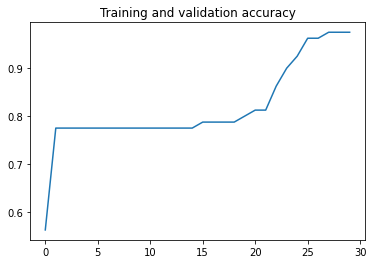

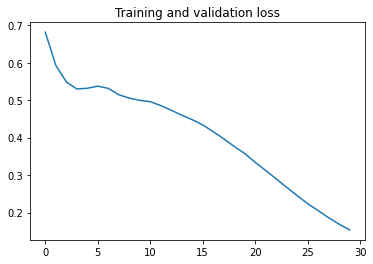

In [72]:
import matplotlib.pyplot as plt
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
#val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
#val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc , label ='accuracy')
#plt.plot  ( epochs, val_acc,label='val_accuracy' )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss, label='accuracy')
#plt.plot  ( epochs, val_loss, label='val_accuracy')
plt.title ('Training and validation loss')

In [73]:
test_Word = st.text_input('Please type a sentence.')


2021-11-26 18:25:01.327 
  command:

    streamlit run /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py [ARGUMENTS]
